In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_dir=r'C:\Users\kores\Downloads\Final_Assignment_Face Mask Dataset\Train'
valid_dir=r'C:\Users\kores\Downloads\Final_Assignment_Face Mask Dataset\Validation'
test_dir=r'C:\Users\kores\Downloads\Final_Assignment_Face Mask Dataset\Test'

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_data=ImageDataGenerator(rescale=1./255,
                             rotation_range=40,
                             height_shift_range=0.2,
                             width_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True)
valid_data=ImageDataGenerator(rescale=1./255)

In [6]:
train_gen=train_data.flow_from_directory(
    train_dir,
    target_size=(128,128),
    batch_size=20,
    class_mode='binary')

valid_gen=valid_data.flow_from_directory(
    valid_dir,
    target_size=(128,128),
    batch_size=20,
    class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [7]:
from tensorflow.keras.applications import VGG19
from keras import models
from keras import layers


In [8]:
conv_base=VGG19(
    weights='imagenet',
    include_top=False,
    input_shape=(128,128,3))

In [9]:
conv_base.trainable=False

In [10]:
model=keras.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [11]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(learning_rate=(2e-5)),
             metrics=['acc'])

In [14]:
checkpoint_cb=keras.callbacks.ModelCheckpoint('face_model-{epoch:02d}.h5',save_best_only=True)

In [15]:
model_history=model.fit(
    train_gen,
    steps_per_epoch=500,
    epochs=7,
    validation_data=valid_gen,
    validation_steps=40,
    callbacks=[checkpoint_cb])

Epoch 1/7
500/500 [==============================] - 521s 1s/step - loss: 0.1820 - acc: 0.9385 - val_loss: 0.0552 - val_acc: 0.9825
Epoch 2/7
500/500 [==============================] - 480s 960ms/step - loss: 0.1262 - acc: 0.9546 - val_loss: 0.0540 - val_acc: 0.9825
Epoch 3/7
500/500 [==============================] - 472s 944ms/step - loss: 0.1002 - acc: 0.9650 - val_loss: 0.0335 - val_acc: 0.9887
Epoch 4/7
500/500 [==============================] - 474s 948ms/step - loss: 0.0956 - acc: 0.9663 - val_loss: 0.0369 - val_acc: 0.9875
Epoch 5/7
500/500 [==============================] - 475s 950ms/step - loss: 0.0884 - acc: 0.9679 - val_loss: 0.0224 - val_acc: 0.9887
Epoch 6/7
500/500 [==============================] - 786s 2s/step - loss: 0.0812 - acc: 0.9696 - val_loss: 0.0222 - val_acc: 0.9925
Epoch 7/7
500/500 [==============================] - 459s 918ms/step - loss: 0.0825 - acc: 0.9690 - val_loss: 0.0180 - val_acc: 0.9950


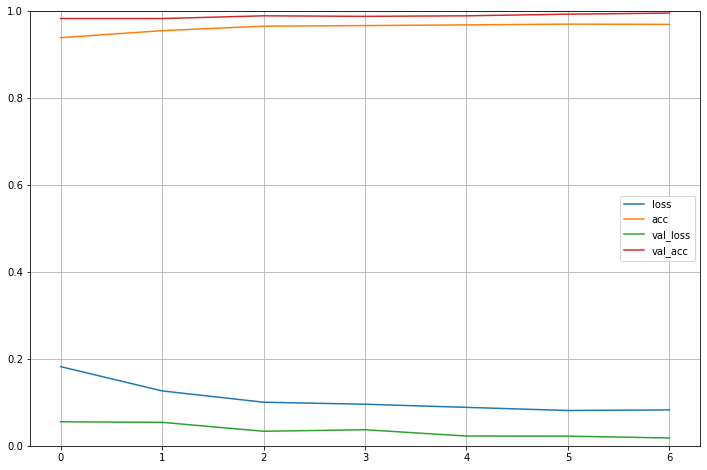

In [17]:
pd.DataFrame(model_history.history).plot(figsize=(12,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [18]:
test_data=ImageDataGenerator(rescale=1./255)

In [19]:
test_gen=test_data.flow_from_directory(
    test_dir,
    target_size=(128,128),
    batch_size=20,
    class_mode='binary'
    )

Found 992 images belonging to 2 classes.


In [20]:
model.evaluate(test_gen)

50/50 [==============================] - 36s 723ms/step - loss: 0.0291 - acc: 0.9899


[0.02906920202076435, 0.9899193644523621]